
# Practical 9: Investigation of the charge and discharge of capacitors

## Introduction

In this experiment, the aim is to confirm the theory we have learnt in lessons that a capacitor's chage increases / decreases exponentially when it is charging / discharging.



## Theory
<!-- This will get SI unitx to work (somewhat) -->
$$\newcommand{\SI}[2]{{#1}~\mathrm{#2}}
\newcommand{\ohm}{\Omega}
\newcommand{\farad}{F}
\newcommand{\micro}{\mu}$$
As a capacitor of capacitance $C$ is discharged through a resistor of resistance $R$ the voltage across the capacitor $V$ varies according to

$$
\begin{equation}
V=V_0\text{e}^{-\frac{t}{RC}}
\end{equation}
$$

where $V_0$ is the voltage across the capacitor when $t=0$.

If the same capacitor is now charged in series with a resistance $R$, the voltage across the capacitor varies according to

$$
\begin{equation}
V=V_0\left(1-\text{e}^{-\frac{t}{RC}}\right)
\end{equation}
$$

where $V_0$ is the voltage across the capacitor _when it is fully charged_ (i.e. the supply voltage).

## Experimental method

Here is the circuit I used:
<img src="capcircuit.jpg" height="150" width="150" />

After a preliminary experiment to investigate the circuit, I decided to use a capacitor with capacitance $\SI{2200}{\micro\farad}$, and resistor with $R=\SI{22}{k\ohm}$, giving a time constant of $\SI{48}{s}$.  I consider this to be a reasonable amount of time to get the experiment done, but allowing the voltage to change slowly enough to get accurate results.

## Risk assessment

1. Capacitors store energy (I got an electric shock once when dismantling a camera flash) so I am going to be careful not to touch the contacts of the capacitor unless I know I have discharged it first
1. Usual hazards with electrical equipment: keeping well away from water, taking care not to short out the battery
1. Working in lab: bags under desk, tidy work area...



## Results

| $t/\mathrm{s}$ | Charging voltage / V | Discharging voltage / V |
|-------|------|
| 0 | 0.00 | 3.93 |
| 10 | 0.84 | 3.08 |
| 20 | 1.59 | 2.48 |
| 30 | 2.18 | 2.02 |
| 40 | 2.68 | 1.65 |
| 50 | 3.11 | 1.40 |
| 60 | 3.43 | 1.17 |
| 70 | 3.69 | 0.99 |
| 80 | 3.82 | 0.84 |
| 90 | 3.90 | 0.71 |
| 100 | 3.95 | 0.59 |
| 110 | 3.98 | 0.50 |
| 120 | 4.01 | 0.42 |
| 130 | 4.02 | 0.36 |
| 140 | 4.03 | 0.30 |
| 150 | 4.03 | 0.25 |
| 170 | 4.03 | 0.22 |
| 180 | - | 0.18 |
| 190 | - | 0.15 |
| 200 | - | 0.13 |
| 210 | - | 0.11 |

## Analysis

My first graph shows the charging and discharging voltages of the capacitor against time:

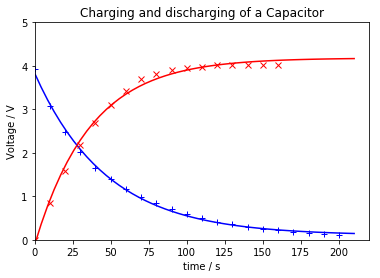

In [3]:
%matplotlib inline
# Plotting library
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# time into an array
# Time is every 10 seconds, starting at 10, ending at 210
times=[]
for i in range(21):
    times.append(10.0*i)

# Import voltage data into an array
voltage = [0.00,0.84,1.59,2.18,2.68,3.11,3.43,3.69,3.82,3.90,3.95,3.98,4.01,4.02,4.03,4.03,4.03,np.nan,np.nan,np.nan,np.nan]
voltage2 = [3.93,3.08,2.48,2.02,1.65,1.40,1.17,0.99,0.84,0.71,0.59,0.50,0.42,0.36,0.30,0.25,0.22,0.18,0.15,0.13,0.11]
    
# Discharging fit
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,210,50)
y = func(x, 6.0, 0.05, 0.0)

popt, pcov = curve_fit(func, times, voltage2) # do curve fit

plt.plot(x, func(x, *popt), 'b-') #plot fit

# Charging fit
def func(x, a, b, c):
    return a*(1-np.exp(-b*x)) + c

x = np.linspace(0,210,50)
y = func(x, 6.0, 0.05, 0.0)

popt, pcov = curve_fit(func, times[0:17], voltage[0:17]) # do fit; only use values not NaN

plt.plot(x, func(x, *popt), 'r-') #plot fit

plt.plot(times, voltage,  marker='x', linestyle="none", color='red', label="charging")
plt.plot(times, voltage2,  marker='+', linestyle="none", color='blue', label="discharging")

plt.xlim(0,220) # range on x axis
plt.ylim(0,5) # range on y axis

plt.xlabel('time / s')
plt.ylabel('Voltage / V')
plt.title('Charging and discharging of a Capacitor')

plt.show()

In my second graph, I am going to check that the discharge curve is exponential.  Starting with the equation for discharging a capacitor and taking logs of both sides:

$$
\begin{align}
V&=V_0\text{e}^{-\frac{t}{RC}}\\
\ln V &=\ln V_{0}-\frac{t}{RC}
\end{align}
$$

If I now plot $\ln V$ on the $y$-axis and $t$ on the $x$-axis, the graph should be a straight line with $y$-intercept of $\ln V_{0}$ and a negative slope with gradient $-\frac{1}{RC}$.

Here is this second plot:

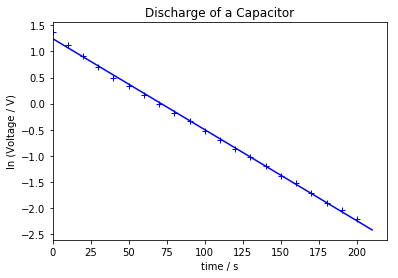

-0.0174717803181


In [1]:
# Plotting library
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats #for best fit line fitting

# time into an array
# Time is every 10 seconds, starting at 10, ending at 250
times=[]
for i in range(21):
    times.append(10*i)

# Import voltage data into an array
voltage = [3.93,3.08,2.48,2.02,1.65,1.40,1.17,0.99,0.84,0.71,0.59,0.50,0.42,0.36,0.30,0.25,0.22,0.18,0.15,0.13,0.11]

slope, intercept, r_value, p_value, std_err = stats.linregress(times,np.log(voltage)) # fit a straight line(least squares)

x = np.linspace(0,210,50) # for plotting the best fit line
y= slope * x + intercept # gradient line y values
plt.plot(x, y, 'b-') # plot best fit line

plt.plot(times, np.log(voltage),  marker='+', linestyle="none", color='blue') # plot the log data

plt.xlim(0,220) # x range limits

plt.xlabel('time / s')
plt.ylabel('ln (Voltage / V)')
plt.title('Discharge of a Capacitor')

plt.show()

print (slope) # print the value of the gradient

The value of the gradient (representing $-1/RC$ in s$^{-1}$) gives a value of $RC=\SI{57}{s}$, which is quite a way from the $\SI{48}{s}$ I expected it to be.